In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import abroad.machine_learning as ML
import os
from datetime import datetime
import textwrap

In [2]:
df7_dir = './data/df_7/'
df13_dir = './data/df_13/'

## All Artefacts ##

In [3]:
targets = {"All": ['Control', 'Horizontal', 'Vertical', 'Pressure',
                         'Frown', 'Ambient Light', 'Torch Light'],
          "Light":['Control', 'Ambient Light', 'Torch Light'],
      "Motion":['Control', 'Horizontal', 'Vertical', 'Pressure',
                         'Frown']}

artefact_key = {"All": " ",
               "Light": " light ",
               "Motion": " motion "}

In [4]:
features = [{"data":pd.read_csv(os.path.join(df7_dir,'parallel_features_7_%s.csv'%(x)), index_col=0),"sensor": 7, "targets":targets[x], "artefact": artefact_key[x]} for x  in ['All', 'Light', 'Motion']]

In [5]:
features.extend([{"data":pd.read_csv(os.path.join(df13_dir,'parallel_features_13_%s.csv'%(x)), index_col=0),"sensor": 13, "targets":targets[x], "artefact": artefact_key[x]} for x  in ['All', 'Light', 'Motion']])

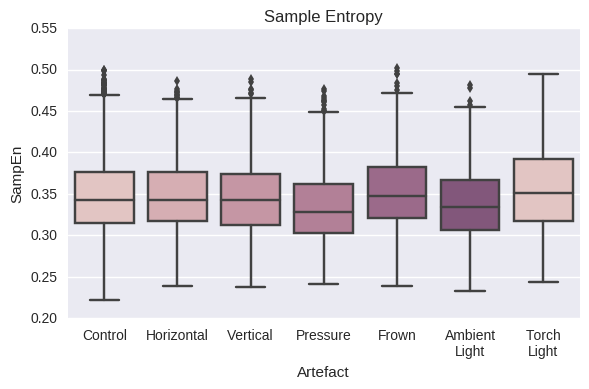

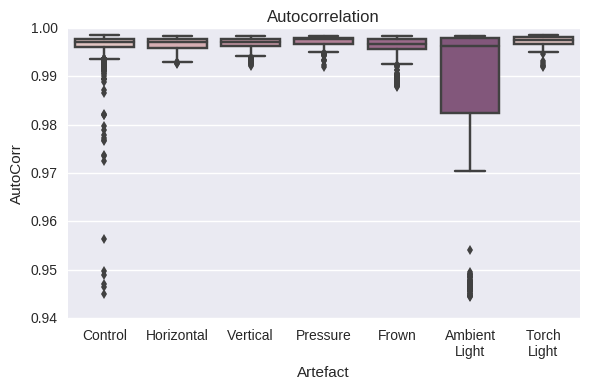

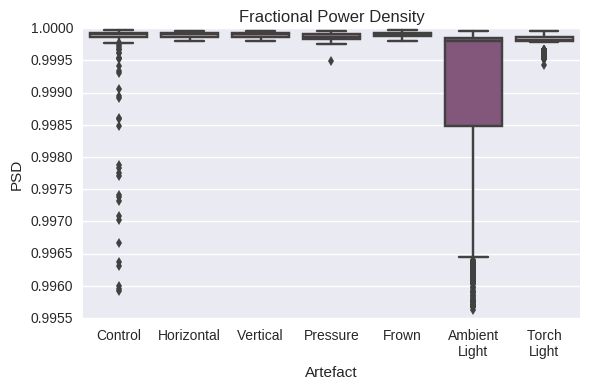

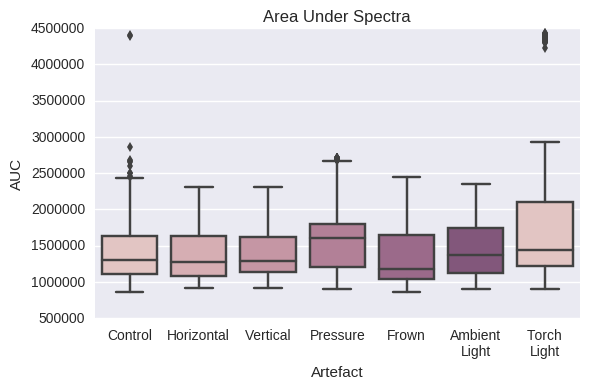

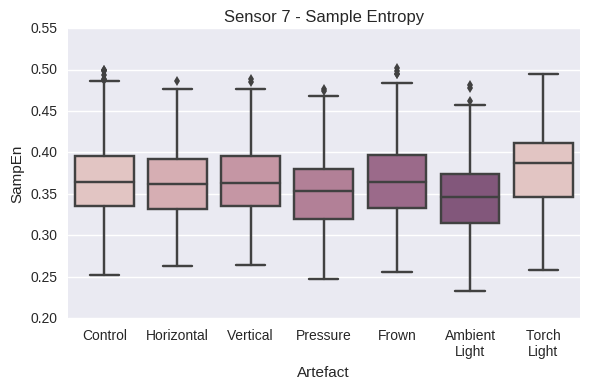

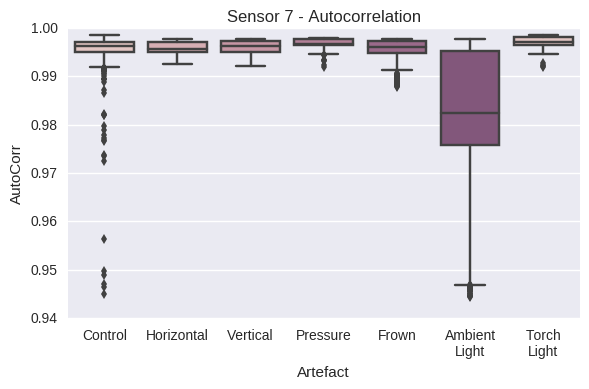

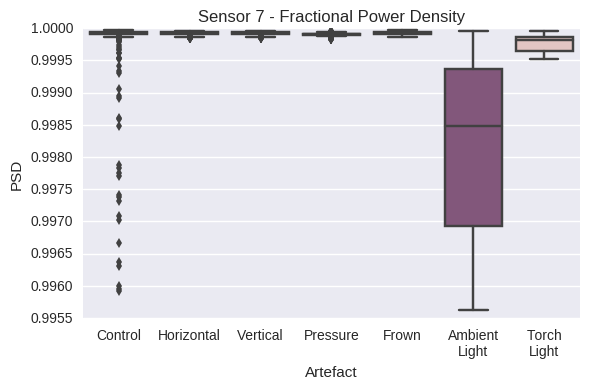

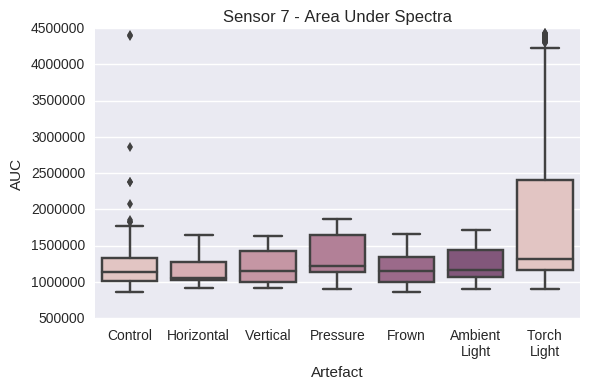

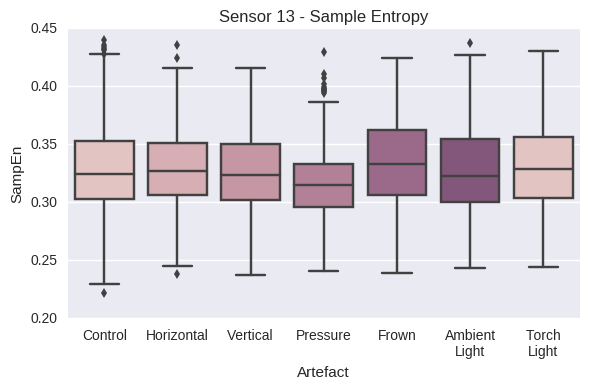

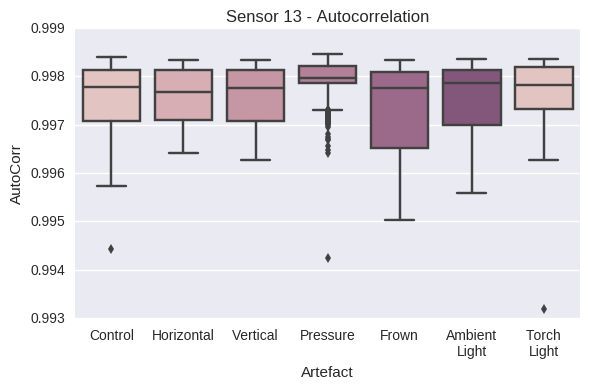

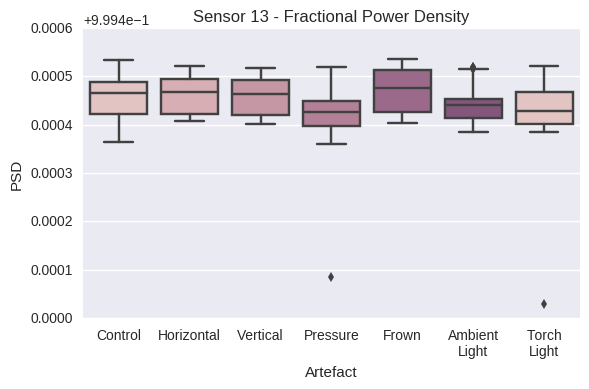

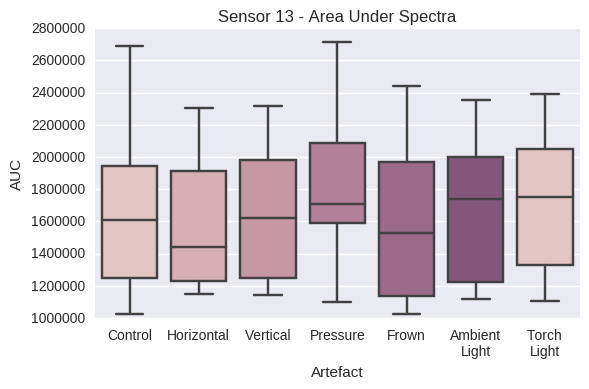

In [72]:
def artefact_name(x):
    print(targets['All'][int(x['Artefact'])])
    #return x['Artefact']=targets['All'][x['Artefact']]
    
feat_dict={'AUC': 'Area Under Spectra', 'PSD': "Fractional Power Density", 'AutoCorr': "Autocorrelation", 'SampEn': "Sample Entropy"}
cmap = sns.cubehelix_palette(dark=0.4, light=0.8)
for df in [pd.concat([features[0]['data'],features[3]['data']])]:
    for k, v in feat_dict.items():
        ax = sns.boxplot(x='Artefact', y=k, data=df[['Artefact',k]], palette=cmap)
        plt.title('{}'.format(v))
        ax.set_xticklabels([textwrap.fill(targets['All'][int(i.get_text())],10) for _, i in enumerate(ax.get_xticklabels())])
        plt.tight_layout()
        plt.savefig("/home/buck06191/Dropbox/phd/ABroAD/Figures/{}.png".format(k), orientation="landscape")
        plt.show()
    
for df in [features[0],features[3]]:
    for k, v in feat_dict.items():
        ax = sns.boxplot(x='Artefact', y=k, data=df['data'][['Artefact',k]], palette=cmap)
        plt.title('Sensor {} - {}'.format(df['sensor'],v))
        ax.set_xticklabels([textwrap.fill(targets['All'][int(i.get_text())],10) for _, i in enumerate(ax.get_xticklabels())])
        plt.tight_layout()
        plt.savefig("/home/buck06191/Dropbox/phd/ABroAD/Figures/sensor{}-{}.png".format(df['sensor'],k), orientation="landscape")
        plt.show()

# Misc Figures

In [64]:
def block_allocator(df, targetname = "Artefact", blockname="Block"):
    i = 0
    prev = 0
    for idx, x in enumerate(df[targetname]):
        if x == prev:
            df.loc[idx, blockname] = int(i)
        else:
            i+=1
            df.loc[idx, blockname] = int(i)
        prev = int(x)
    return df

test_df = pd.DataFrame({"Artefact": [0,0,0,1,1,1,2,2,2,1,1,1,4,4,4]})
block_allocator(test_df)

,Artefact,Block
0,0,0.0
1,0,0.0
2,0,0.0
3,1,1.0
4,1,1.0
5,1,1.0
6,2,2.0
7,2,2.0
8,2,2.0
9,1,3.0


In [72]:
conc_df = pd.read_csv('./data/conc_subject_5.csv', names= ['HbO2 (uM)', 'HHb (uM)', 'oxCCO (uM)', 'HbT (uM)', 'Artefact', 'Subject'], skiprows=1)
conc_df['Time (sec)'] = np.arange(0,conc_df.shape[0]/5,0.2)
conc_df = block_allocator(conc_df)
artefact_names = ['Control', 'Horizontal Motion', 'Vertical Motion', 'Pressure', 'Frowning', 'Ambient Light', 'Torch Light'] 
conc_df['Artefact'] = [artefact_names[x] for x in conc_df['Artefact']]

predictions = np.genfromtxt('./data/21Jul17T1402/predictions/predictions-Sensor7-All.txt.bak')
conc_df['Predictions'] = predictions[:conc_df.shape[0]]
conc_df = block_allocator(conc_df, 'Predictions', "Block2")
#conc_df['Predictions2'] = 

print(len(predictions))
print(conc_df.shape)

1688
(848, 10)


In [75]:
def artefact_plot(x, y, blockname="Block", **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    blocks = list(set(data[blockname]))
    blocks.sort()
    for block in blocks:
        data[data[blockname]==block].plot(x=x, y=y, ax=ax, **kwargs)

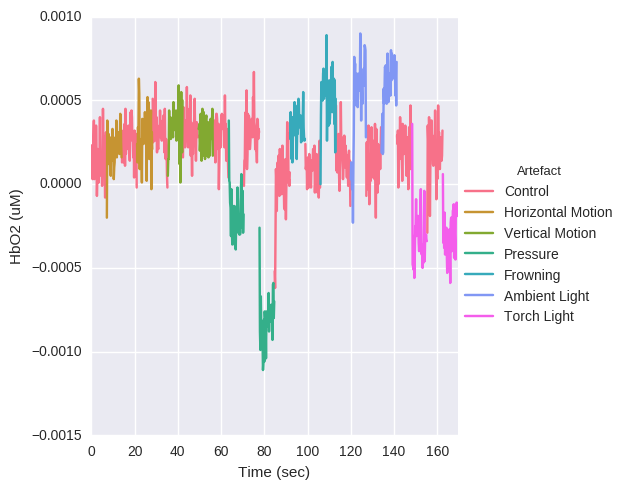

In [76]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
colors = sns.color_palette("Set1", 7)
g = sns.FacetGrid(conc_df, hue='Artefact', size=5, xlim=(0,170), ylim = (-0.0015,0.001), legend_out=True)
(g.map_dataframe(artefact_plot, 'Time (sec)', 'HbO2 (uM)')).add_legend()

/home/buck06191/anaconda3/envs/data/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=38.4, right=38.4
  'left=%s, right=%s') % (left, right))


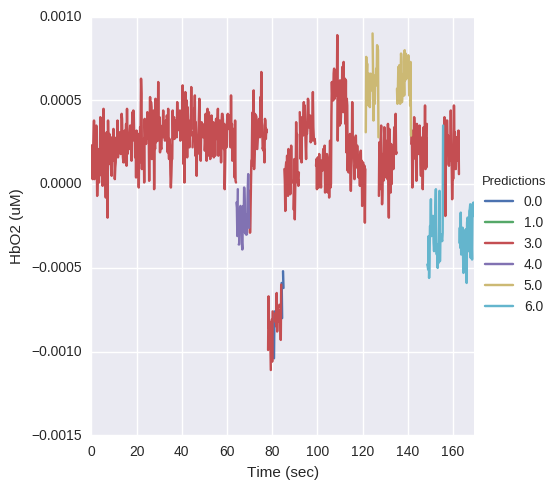

In [78]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
colors = sns.color_palette("Set1", 7)
g = sns.FacetGrid(conc_df, hue='Predictions', size=5, xlim=(0,170), ylim = (-0.0015,0.001), legend_out=True)
(g.map_dataframe(artefact_plot, 'Time (sec)', 'HbO2 (uM)', 'Block2')).add_legend()